In [51]:
import sys                          
import pandas as pd, numpy as np             # Data manipulation 
from sklearn.decomposition import PCA        # The main algorithm
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing
from collections import defaultdict, Counter # Utils
sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [52]:
dataset_limit = 10000
keep_dates = False

# load the data file 
df = pd.read_excel('../DATA/Olymp88.xlsx', index_col=0)
df.head()

,r100m,longjump,shot,highjump,r400m,h110m,discus,polevlt,javelin,r1500m,score
Athlete,,,,,,,,,,,
1,11.2500,7.4300,15.4800,2.2700,48.9000,15.1300,49.2800,4.7000,61.3200,268.9500,8488
2,10.8700,7.4500,14.9700,1.9700,47.7100,14.4600,44.3600,5.1000,61.7600,273.0200,8399
3,11.1800,7.4400,14.2000,1.9700,48.2900,14.8100,43.6600,5.2000,64.1600,263.2000,8328
4,10.6200,7.3800,15.0200,2.0300,49.0600,14.7200,44.8000,4.9000,64.0400,285.1100,8306
5,11.0200,7.4300,12.9200,1.9700,47.4400,14.4000,41.2000,5.2000,57.4600,256.6400,8286


In [53]:
# make a copy of the original dataframe
df_orig = df.copy()    

# Get the column names
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)
date_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Print a quick summary of what we just loaded
print("Loaded dataset")
print("   Rows: %s" % df.shape[0])
print("   Columns: %s (%s num, %s cat, %s date)" % (df.shape[1], 
                                                    len(numerical_columns), len(categorical_columns),
                                                    len(date_columns)))

Loaded dataset
   Rows: 34
   Columns: 11 (11 num, 0 cat, 0 date)


In [ ]:
# columns_to_drop = []
# if keep_dates:
#     df[date_columns] = df[date_columns].astype(int)*1e-9
# else:
#     columns_to_drop.extend(date_columns)

# columns_to_drop

# DROP_LIMIT_ABS = 200
# CAT_DROP_LIMIT_RATIO = 0.5
# for feature in categorical_columns:
#     nu = df[feature].nunique()
    
#     if nu > DROP_LIMIT_ABS or nu > CAT_DROP_LIMIT_RATIO*df.shape[0]:
#         print("Dropping feature %s with %s values" % (feature, nu))
#         columns_to_drop.append(feature)

# columns_to_drop

In [54]:
df = df.drop(columns = ['score'])
df.head()

,r100m,longjump,shot,highjump,r400m,h110m,discus,polevlt,javelin,r1500m
Athlete,,,,,,,,,,
1,11.2500,7.4300,15.4800,2.2700,48.9000,15.1300,49.2800,4.7000,61.3200,268.9500
2,10.8700,7.4500,14.9700,1.9700,47.7100,14.4600,44.3600,5.1000,61.7600,273.0200
3,11.1800,7.4400,14.2000,1.9700,48.2900,14.8100,43.6600,5.2000,64.1600,263.2000
4,10.6200,7.3800,15.0200,2.0300,49.0600,14.7200,44.8000,4.9000,64.0400,285.1100
5,11.0200,7.4300,12.9200,1.9700,47.4400,14.4000,41.2000,5.2000,57.4600,256.6400


In [56]:
impute = True # you can change this

if impute:
    # Use mean for numerical features
    for feature in df.columns:
        v = df[feature].mean()
        if np.isnan(v):
            v = 0
        print("Filling %s with %s" % (feature, v))
        df[feature] = df[feature].fillna(v)

    # Use mode for categorical features
    for feature in categorical_columns:
        v = df[feature].value_counts().index[0]
        df[feature] = df[feature].fillna(v)

else:        
    # drop records
    df.dropna(inplace=True)

Filling r100m with 11.223529411764705
Filling longjump with 7.095
Filling shot with 13.850882352941175
Filling highjump with 1.9744117647058823
Filling r400m with 49.366176470588236
Filling h110m with 15.10764705882353
Filling discus with 41.90529411764705
Filling polevlt with 4.6764705882352935
Filling javelin with 58.84058823529411
Filling r1500m with 276.1914705882353


<Axes: >

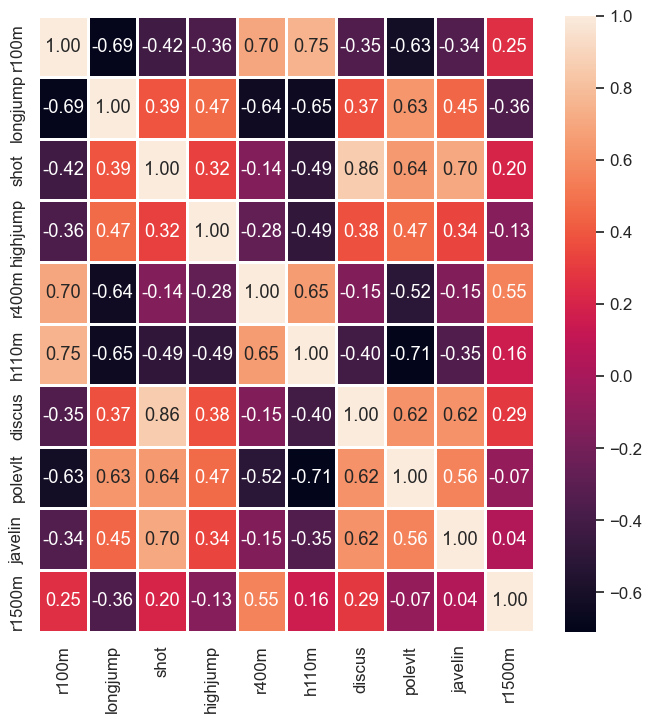

In [57]:
# Heatmap to show correlation between explanatory variables
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(df)
X_std = ss.transform(df)

In [59]:
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

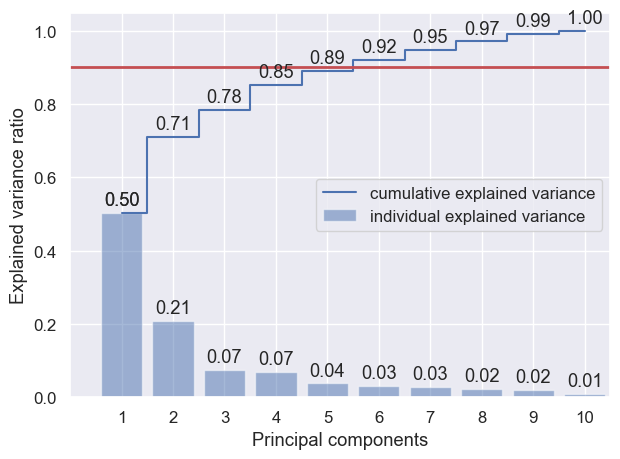

In [60]:
plt.bar(range(1,sklearn_pca.n_components_+1), sklearn_pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,sklearn_pca.n_components_+1), [sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)], where='mid',label='cumulative explained variance')
plt.axhline(y=0.90, linewidth=2, color = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
for i, ratio in enumerate(sklearn_pca.explained_variance_ratio_):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
for i, ratio in enumerate([sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)]):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')

plt.xlim([0, sklearn_pca.n_components_+0.5])
plt.xticks(range(1, sklearn_pca.n_components_ + 1))
plt.legend(loc='best')
plt.tight_layout()

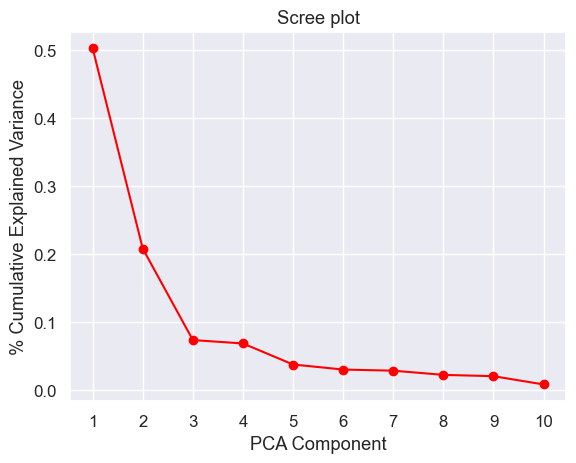

In [61]:
# Scree plot 
plt.plot(
    range(1,len(sklearn_pca.explained_variance_ratio_ )+1),
    sklearn_pca.explained_variance_ratio_,
    c='red', marker='o'
)
plt.xticks(range(1, len(sklearn_pca.explained_variance_ratio_) + 1))   
plt.xlabel('PCA Component')
plt.ylabel('% Cumulative Explained Variance')
plt.title('Scree plot')
plt.show()

In [63]:
VARIANCE_TO_KEEP = 0.72 # that would mean two componentes in our example
keep_recommend = [sklearn_pca.explained_variance_ratio_[:y].sum()>VARIANCE_TO_KEEP for y in range(1,sklearn_pca.n_components_+1)].count(False)
print("Number of components to keep to retain %s%% of the variance:" % (100*VARIANCE_TO_KEEP), keep_recommend, "out of the original", sklearn_pca.n_components_)
n_components = keep_recommend

Number of components to keep to retain 72.0% of the variance: 2 out of the original 10


In [64]:
sklearn_pca_final = PCA(n_components)
Y_sklearn = sklearn_pca_final.fit_transform(X_std)

In [69]:
# Shows Factor loadings = correlations between variables and factors
print ("")
print ("Factor loadings:")

pd.set_option('display.float_format', '{:.4f}'.format)

dfloadings=pd.DataFrame(
    data    = sklearn_pca_final.components_,
    columns = df.columns,
)

index_list=[]
for n in range(n_components):
    index_list.append("PC"+str(n+1))

dfloadings.index = index_list

# Hide low values so that it is clearer
dfloadings.T.where(abs(dfloadings.T) > 0.35  , "")  # we hide values lower than 0.25 to better display the relations


Factor loadings:


,PC1,PC2
r100m,0.3586,
longjump,-0.3612,
shot,,0.3943
highjump,,
r400m,,0.4272
h110m,0.3734,
discus,,0.4164
polevlt,-0.3889,
javelin,,
r1500m,,0.5456


In [70]:
# Communalities
commun=[]

for col in dfloadings.columns:
    commun.append((dfloadings.iloc[0:3][col]**2).sum())
    
dfcommun = pd.DataFrame(commun,index=dfloadings.columns, columns=["Communalities"])
dfcommun.sort_values("Communalities", ascending=False)

,Communalities
r1500m,0.3047
r400m,0.2691
discus,0.2674
shot,0.2604
javelin,0.1750
r100m,0.1703
longjump,0.1696
h110m,0.1566
polevlt,0.1551
highjump,0.0716


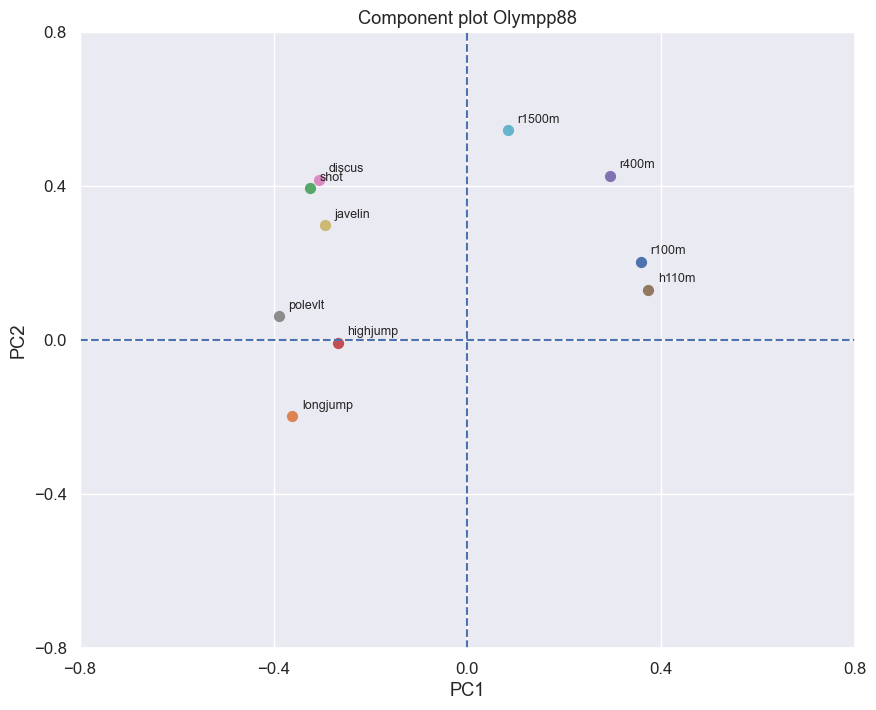

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Get the loadings of x and y axes
dfloadT = dfloadings.T

xs = dfloadT.PC1
ys = dfloadT.PC2
 
plt.figure(figsize=(10, 8))
plt.axvline(x=0, color='b', linestyle='dashed')
plt.axhline(y=0, color='b', linestyle='dashed')

# Plot the loadings on a scatterplot
for i, varnames in enumerate(dfloadings.columns):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=50)
    
    # Slightly offset the text to avoid overlap
    plt.text(xs.iloc[i] + 0.02, ys.iloc[i] + 0.02, varnames, fontsize=9)

# Define the axes and show plot
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Component plot Olympp88')

# Save the plot and show it
plt.savefig('../DATA/Component_plot_Olympp88.png', bbox_inches='tight')  # Avoid cutting parts off
plt.show()

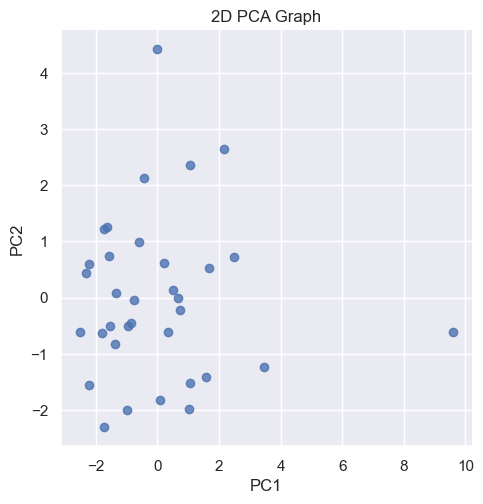

In [72]:
# Create dataframe of two components to display them

sklearn_pca_2 = PCA(n_components=2)
Y_sklearn_2 = sklearn_pca_2.fit_transform(X_std)
indx=np.arange(1, Y_sklearn_2.shape[0]+1)

pca_df_2 = pd.DataFrame(
    data=Y_sklearn_2, 
    columns=['PC1', 'PC2'])

sns.set()
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_2, 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [73]:
frames = [df_orig, pca_df_2]
df_norot = pd.concat(frames,axis=1)
df_norot.to_excel("../DATA/Final_norotations_Olymp88.xlsx")

In [74]:
from factor_analyzer import Rotator

rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(dfloadings.T)

df_varimax = pd.DataFrame(rotated_loadings, columns = ['PC1','PC2'], index=df.columns)
print("")
print("Varimax rotation: ")
df_varimax.where(abs(df_varimax) > 0.3  , "")


Varimax rotation: 


,PC1,PC2
r100m,0.4115,
longjump,-0.4102,
shot,,0.5080
highjump,,
r400m,0.4827,
h110m,0.3831,
discus,,0.5167
polevlt,,
javelin,,0.4113
r1500m,0.3738,0.4061


**PC1** considering running related results like r100-r1500, it might have to do with speed and enduance in the first component.  
**PC2** consdering the throwing related results like shot and javeline, it might have to do with throwing strength and power.

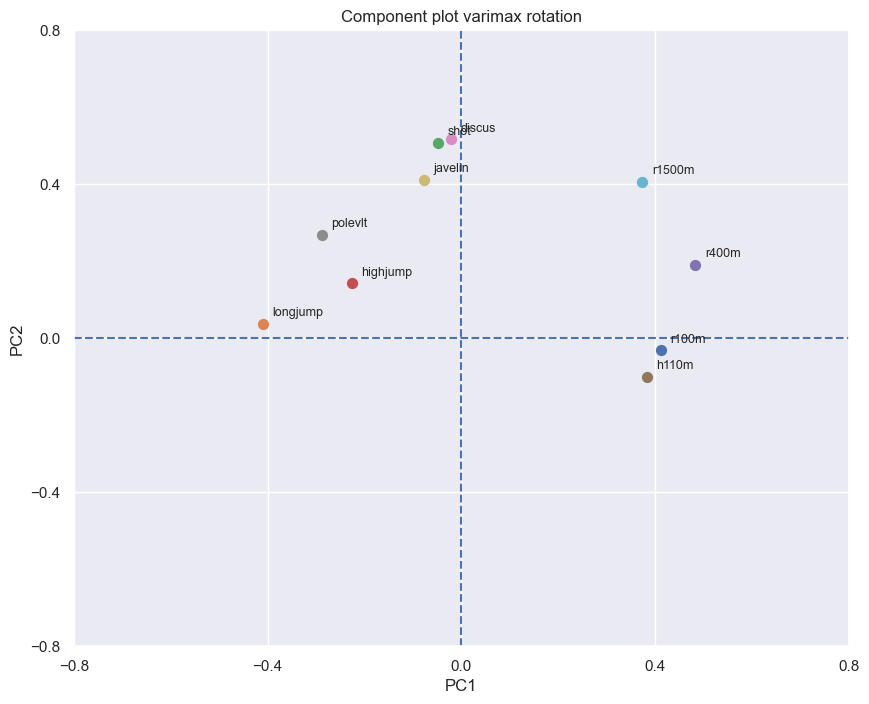

In [75]:
# Represent the component plot rotated
xs = df_varimax.PC1
ys = df_varimax.PC2
 
plt.figure(figsize = (10, 8))
plt.axvline(x = 0, color = 'b', linestyle = 'dashed')
plt.axhline(y = 0, color = 'b', linestyle = 'dashed')

# Plot the loadings on a scatterplot
for i, varnames in enumerate(df_varimax.T):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=50)
    plt.text(xs.iloc[i] + 0.02, ys.iloc[i] + 0.02, varnames, fontsize=9)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('Component plot varimax rotation')
plt.savefig('../DATA/Component plot varimax rotation.png')
plt.show()

## Dropping Variables & Rerun

In [89]:
dataset_limit = 10000
keep_dates = False

# load the data file 
df = pd.read_excel('../DATA/Olymp88.xlsx', index_col=0)
df.head()

,r100m,longjump,shot,highjump,r400m,h110m,discus,polevlt,javelin,r1500m,score
Athlete,,,,,,,,,,,
1,11.2500,7.4300,15.4800,2.2700,48.9000,15.1300,49.2800,4.7000,61.3200,268.9500,8488
2,10.8700,7.4500,14.9700,1.9700,47.7100,14.4600,44.3600,5.1000,61.7600,273.0200,8399
3,11.1800,7.4400,14.2000,1.9700,48.2900,14.8100,43.6600,5.2000,64.1600,263.2000,8328
4,10.6200,7.3800,15.0200,2.0300,49.0600,14.7200,44.8000,4.9000,64.0400,285.1100,8306
5,11.0200,7.4300,12.9200,1.9700,47.4400,14.4000,41.2000,5.2000,57.4600,256.6400,8286


In [90]:
df.drop(columns = ['score', 'highjump', 'polevlt'], inplace=True)
df.head()

,r100m,longjump,shot,r400m,h110m,discus,javelin,r1500m
Athlete,,,,,,,,
1,11.2500,7.4300,15.4800,48.9000,15.1300,49.2800,61.3200,268.9500
2,10.8700,7.4500,14.9700,47.7100,14.4600,44.3600,61.7600,273.0200
3,11.1800,7.4400,14.2000,48.2900,14.8100,43.6600,64.1600,263.2000
4,10.6200,7.3800,15.0200,49.0600,14.7200,44.8000,64.0400,285.1100
5,11.0200,7.4300,12.9200,47.4400,14.4000,41.2000,57.4600,256.6400


In [91]:
# make a copy of the original dataframe
df_orig = df.copy()    

# Get the column names
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)
date_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Print a quick summary of what we just loaded
print("Loaded dataset")
print("   Rows: %s" % df.shape[0])
print("   Columns: %s (%s num, %s cat, %s date)" % (df.shape[1], 
                                                    len(numerical_columns), len(categorical_columns),
                                                    len(date_columns)))

Loaded dataset
   Rows: 34
   Columns: 8 (8 num, 0 cat, 0 date)


In [92]:
impute = True # you can change this

if impute:
    # Use mean for numerical features
    for feature in df.columns:
        v = df[feature].mean()
        if np.isnan(v):
            v = 0
        print("Filling %s with %s" % (feature, v))
        df[feature] = df[feature].fillna(v)

    # Use mode for categorical features
    for feature in categorical_columns:
        v = df[feature].value_counts().index[0]
        df[feature] = df[feature].fillna(v)

else:        
    # drop records
    df.dropna(inplace=True)

Filling r100m with 11.223529411764705
Filling longjump with 7.095
Filling shot with 13.850882352941175
Filling r400m with 49.366176470588236
Filling h110m with 15.10764705882353
Filling discus with 41.90529411764705
Filling javelin with 58.84058823529411
Filling r1500m with 276.1914705882353


<Axes: >

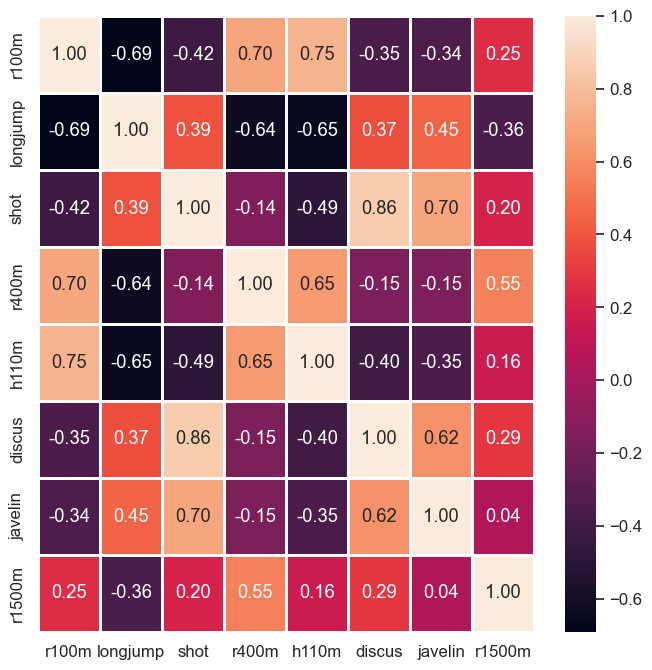

In [93]:
# Heatmap to show correlation between explanatory variables
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

In [94]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(df)
X_std = ss.transform(df)

In [95]:
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

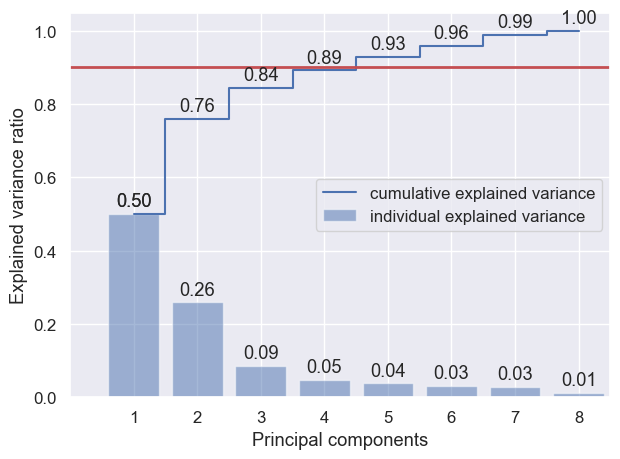

In [96]:
plt.bar(range(1,sklearn_pca.n_components_+1), sklearn_pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,sklearn_pca.n_components_+1), [sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)], where='mid',label='cumulative explained variance')
plt.axhline(y=0.90, linewidth=2, color = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
for i, ratio in enumerate(sklearn_pca.explained_variance_ratio_):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
for i, ratio in enumerate([sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)]):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')

plt.xlim([0, sklearn_pca.n_components_+0.5])
plt.xticks(range(1, sklearn_pca.n_components_ + 1))
plt.legend(loc='best')
plt.tight_layout()

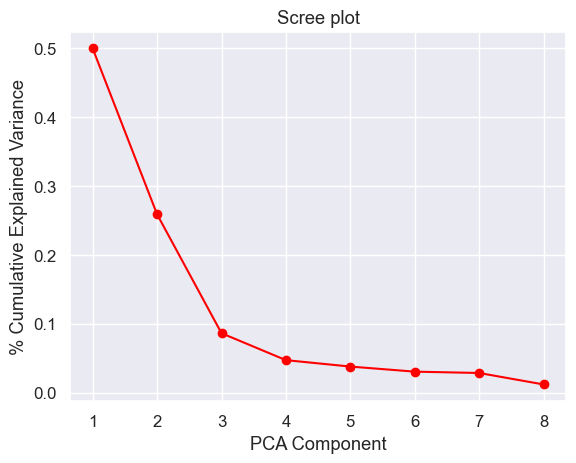

In [97]:
# Scree plot 
plt.plot(
    range(1,len(sklearn_pca.explained_variance_ratio_ )+1),
    sklearn_pca.explained_variance_ratio_,
    c='red', marker='o'
)
plt.xticks(range(1, len(sklearn_pca.explained_variance_ratio_) + 1))   
plt.xlabel('PCA Component')
plt.ylabel('% Cumulative Explained Variance')
plt.title('Scree plot')
plt.show()

In [98]:
VARIANCE_TO_KEEP = 0.77 # that would mean two componentes in our example
keep_recommend = [sklearn_pca.explained_variance_ratio_[:y].sum()>VARIANCE_TO_KEEP for y in range(1,sklearn_pca.n_components_+1)].count(False)
print("Number of components to keep to retain %s%% of the variance:" % (100*VARIANCE_TO_KEEP), keep_recommend, "out of the original", sklearn_pca.n_components_)
n_components = keep_recommend

Number of components to keep to retain 77.0% of the variance: 2 out of the original 8


In [99]:
sklearn_pca_final = PCA(n_components)
Y_sklearn = sklearn_pca_final.fit_transform(X_std)

In [104]:
# Shows Factor loadings = correlations between variables and factors
print ("")
print ("Factor loadings:")

pd.set_option('display.float_format', '{:.4f}'.format)

dfloadings=pd.DataFrame(
    data    = sklearn_pca_final.components_,
    columns = df.columns,
)

index_list=[]
for n in range(n_components):
    index_list.append("PC"+str(n+1))

dfloadings.index = index_list

# Hide low values so that it is clearer
dfloadings.T.where(abs(dfloadings.T) > 0.4  , "")  # we hide values lower than 0.25 to better display the relations


Factor loadings:


,PC1,PC2
r100m,0.4170,
longjump,-0.4114,
shot,,0.4133
r400m,,0.4126
h110m,0.4180,
discus,,0.4339
javelin,,
r1500m,,0.5408


Here it does not make as much sense as the previous one in terms of how to explain the components and therefore I think it would be best to just leave the previous two variables out only

In [105]:
# Communalities
commun=[]

for col in dfloadings.columns:
    commun.append((dfloadings.iloc[0:3][col]**2).sum())
    
dfcommun = pd.DataFrame(commun,index=dfloadings.columns, columns=["Communalities"])
dfcommun.sort_values("Communalities", ascending=False)

,Communalities
r1500m,0.3042
shot,0.3017
discus,0.3005
r400m,0.2902
r100m,0.2078
javelin,0.2074
longjump,0.2008
h110m,0.1874


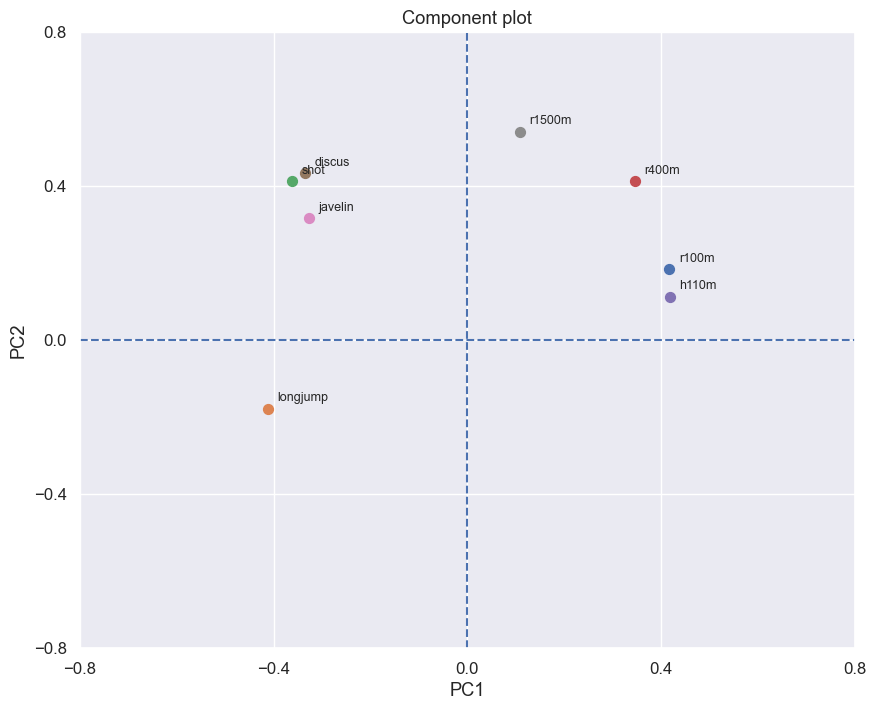

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Get the loadings of x and y axes
dfloadT = dfloadings.T

xs = dfloadT.PC1
ys = dfloadT.PC2
 
plt.figure(figsize=(10, 8))
plt.axvline(x=0, color='b', linestyle='dashed')
plt.axhline(y=0, color='b', linestyle='dashed')

# Plot the loadings on a scatterplot
for i, varnames in enumerate(dfloadings.columns):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=50)
    
    # Slightly offset the text to avoid overlap
    plt.text(xs.iloc[i] + 0.02, ys.iloc[i] + 0.02, varnames, fontsize=9)

# Define the axes and show plot
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Component plot')

# Save the plot and show it
plt.savefig('Component_plot.png', bbox_inches='tight')  # Avoid cutting parts off
plt.show()

In [107]:
from factor_analyzer import Rotator

rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(dfloadings.T)

df_varimax = pd.DataFrame(rotated_loadings, columns = ['PC1','PC2'], index=df.columns)
print("")
print("Varimax rotation: ")
df_varimax.where(abs(df_varimax) > 0.3  , "")


Varimax rotation: 


,PC1,PC2
r100m,0.4475,
longjump,-0.4393,
shot,,0.5458
r400m,0.5198,
h110m,0.4077,
discus,,0.5474
javelin,,0.4467
r1500m,0.3973,0.3825


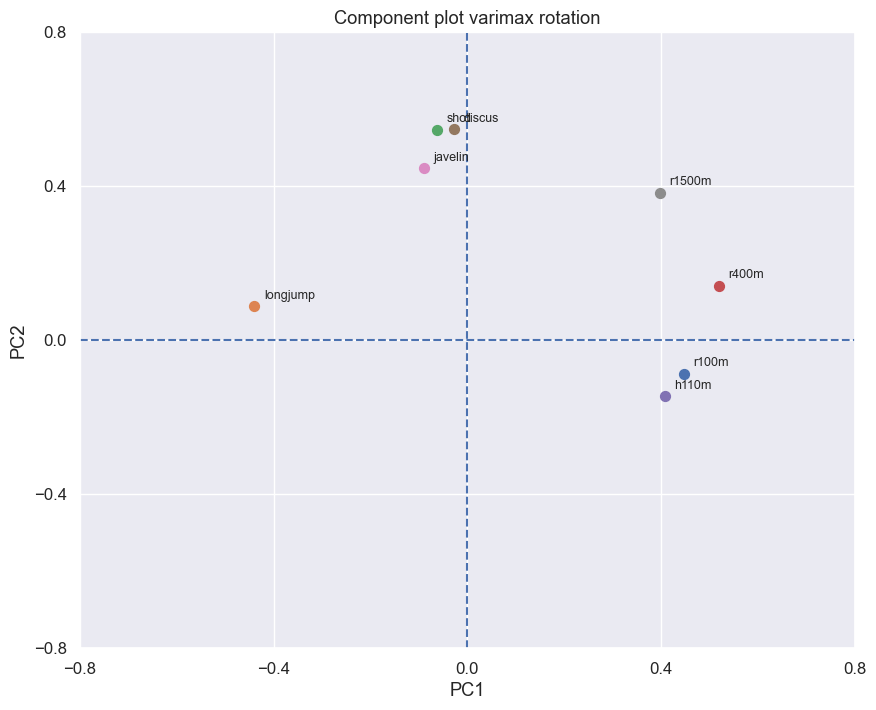

In [108]:
# Represent the component plot rotated
xs = df_varimax.PC1
ys = df_varimax.PC2
 
plt.figure(figsize = (10, 8))
plt.axvline(x = 0, color = 'b', linestyle = 'dashed')
plt.axhline(y = 0, color = 'b', linestyle = 'dashed')

# Plot the loadings on a scatterplot
for i, varnames in enumerate(df_varimax.T):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=50)
    plt.text(xs.iloc[i] + 0.02, ys.iloc[i] + 0.02, varnames, fontsize=9)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('Component plot varimax rotation')
plt.savefig('../DATA/Component plot varimax rotation.png')
plt.show()